Import module and data table part

In [168]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud
import re
import nltk
warnings.filterwarnings("ignore")

#import the data table.
data=pd.read_csv('reddit_wsb.csv')

In [169]:
data

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
53182,What I Learned Investigating SAVA FUD Spreaders,238,owd2pn,https://www.reddit.com/r/wallstreetbets/commen...,87,1.627906e+09,***TLDR: Three bitter scientists partnered up ...,2021-08-02 15:03:27
53183,"Daily Popular Tickers Thread for August 02, 20...",228,owd1a5,https://www.reddit.com/r/wallstreetbets/commen...,1070,1.627906e+09,\nYour daily hype thread. Please keep the shit...,2021-08-02 15:01:03
53184,Hitler reacts to the market being irrational,7398,owc5dr,https://v.redd.it/46jxu074exe71,372,1.627902e+09,NaN,2021-08-02 13:59:35
53185,"Daily Discussion Thread for August 02, 2021",338,owbfjf,https://www.reddit.com/r/wallstreetbets/commen...,11688,1.627898e+09,Your daily trading discussion thread. Please k...,2021-08-02 13:00:16


In [170]:
data.head(5)

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


Fix the attribute information of dataset part

In [171]:
#check the type of all column
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      53187 non-null  object 
 1   score      53187 non-null  int64  
 2   id         53187 non-null  object 
 3   url        53187 non-null  object 
 4   comms_num  53187 non-null  int64  
 5   created    53187 non-null  float64
 6   body       24738 non-null  object 
 7   timestamp  53187 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [172]:
data['title'] = data['title'].astype(pd.StringDtype())

In [173]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      53187 non-null  string 
 1   score      53187 non-null  int64  
 2   id         53187 non-null  object 
 3   url        53187 non-null  object 
 4   comms_num  53187 non-null  int64  
 5   created    53187 non-null  float64
 6   body       24738 non-null  object 
 7   timestamp  53187 non-null  object 
dtypes: float64(1), int64(2), object(4), string(1)
memory usage: 3.2+ MB


In [174]:
#shallow copy of data
wsb_reddit_data = data

Basic information of each dataset property
I observe the basic information of each column of the unprocessed dataset from here to get a general idea of the various information of the dataset

In [175]:
#Summary Stats numeric
score_stats = wsb_reddit_data['score'].describe()

In [176]:
comments_stats = wsb_reddit_data['comms_num'].describe()

In [177]:
time_stats = wsb_reddit_data['timestamp'].describe(datetime_is_numeric=True)

In [178]:
##Summary stats Categorical
title_stats = wsb_reddit_data['title'].describe()

In [179]:
url_stats = wsb_reddit_data['url'].describe()

In [180]:
body_stats = wsb_reddit_data['body'].describe()

In [181]:
score_stats

count     53187.000000
mean       1382.461053
std        7999.271074
min           0.000000
25%           2.000000
50%          37.000000
75%         207.000000
max      348241.000000
Name: score, dtype: float64

In [182]:
comments_stats

count    53187.000000
mean       263.260252
std       2532.665113
min          0.000000
25%          3.000000
50%         17.000000
75%         60.000000
max      93268.000000
Name: comms_num, dtype: float64

In [183]:
time_stats

count                   53187
unique                  43460
top       2021-01-29 01:03:59
freq                       14
Name: timestamp, dtype: object

In [184]:
title_stats

count     53187
unique    52049
top         AMC
freq         40
Name: title, dtype: object

In [185]:
url_stats

count                                              53187
unique                                             53172
top       https://magic.freetrade.io/join/jamie/13edb513
freq                                                  11
Name: url, dtype: object

In [186]:
body_stats

count                                                 24738
unique                                                24147
top       Your daily trading discussion thread. Please k...
freq                                                     74
Name: body, dtype: object

<AxesSubplot:xlabel='title_len', ylabel='count'>

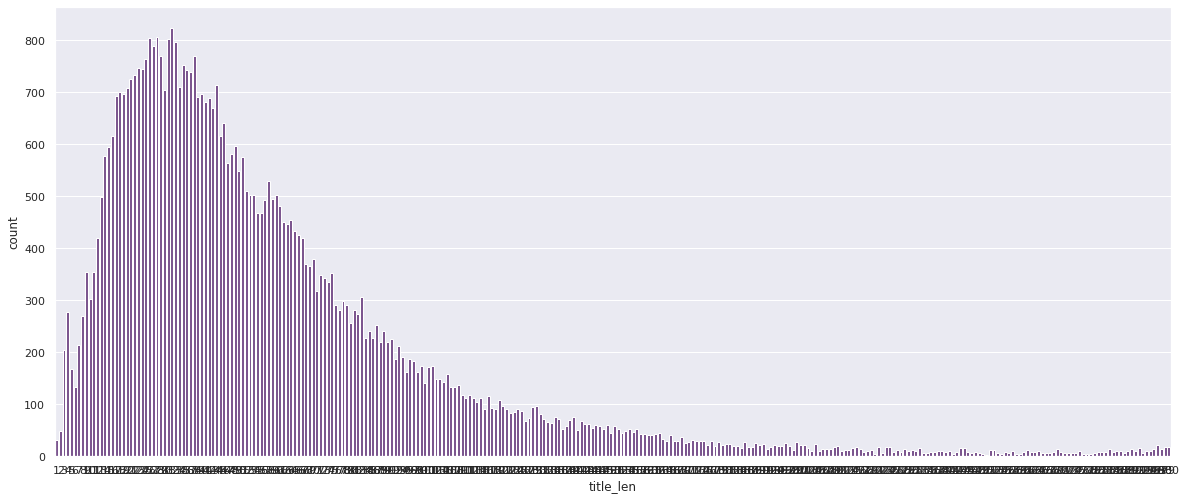

In [187]:
#because, there lots of Nah in "body" column,so i used title part for analysis
data['title_len'] = data['title'].apply(len)
sns.set(rc={'figure.figsize':(20,8.27)})
sns.countplot(data[data['title_len'] > 0]['title_len'],color=(0.5,0.3,0.6,1))

i can see from the chart that the length of the title is mostly distributed under 100,
so when it comes to community comments, people mostly don't post particularly long or large messages

In [188]:
#time series analysis
data["date"] = pd.to_datetime(data.timestamp).dt.date
data["hour"] = pd.to_datetime(data.timestamp).dt.hour

In [189]:
#Create a counter for counting total post
data['post_num'] = 1

In [190]:
#Data and hour
t_chart = data.groupby("date").aggregate({"score": "mean", "comms_num": "mean", "post_num": "sum"})

In [191]:
#Navigate the data.
t_chart.head(5)

,score,comms_num,post_num
date,,,
2020-09-29,4.000000,11.000000,1
2021-01-28,960.609023,142.193818,1197
2021-01-29,408.457309,52.371288,15694
2021-01-30,4618.594101,515.766152,1424
2021-01-31,5230.513312,306.713525,939


We can see that the number and frequency of comments have been skyrocketing since the news was announced,
compared to the 2020-9-29 timeframe when there were almost no comments.I can easily find that on 2021-1-29 the number of posts reached 15694, while the score was only 408.457309, that is, although the number of posts but the emotional score of his post is very negative. I found that the number of posts in the next two days was only 1000, but the emotional score was 4000-5000, which means that the posts started to turn positive.

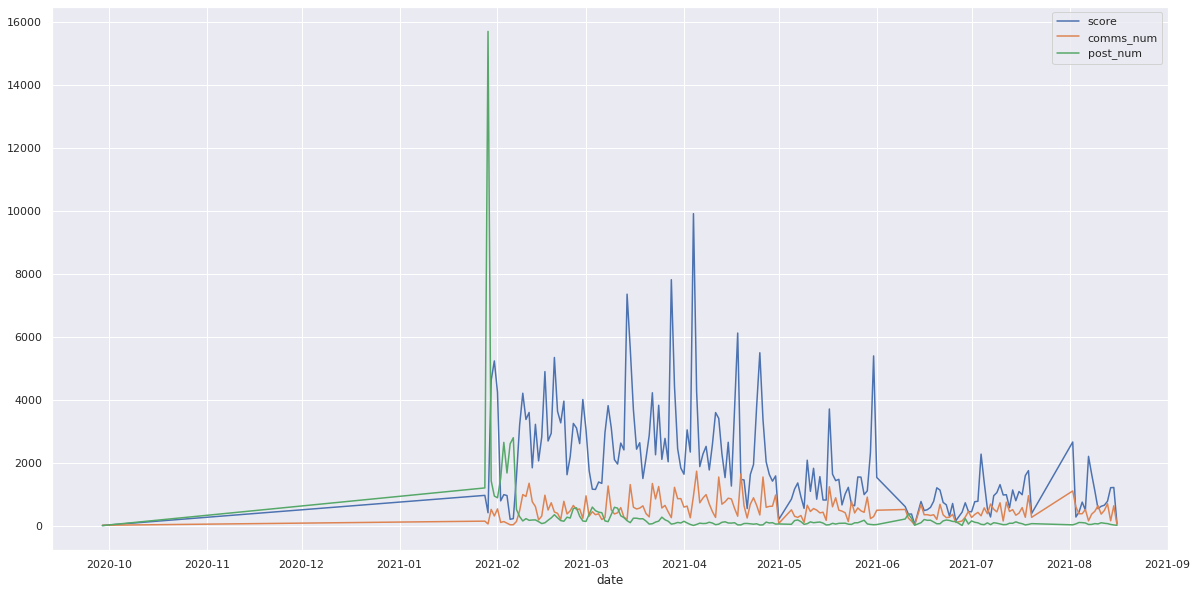

In [192]:
#Plotting the t_chart，Visualize it
t_chart.plot(figsize=(20,10))
plt.show()

It may be easier to see from the chart that the forum is continuously active

In [193]:
#Create word count for title columns.
data['word_count'] = data['title'].apply(lambda x: len(str(x).split(" ")))

In [194]:
#Remove non english/numeric characters from title column.
data['title'] = data['title'].str.replace('[^A-Za-z0-9 ]','',regex=True)

In [195]:
#Convert to lower cases.
data['title'] = data['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [196]:
#Remove all single characters.
data['title'] = data['title'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '',x))

In [197]:
#Convert spaces to one space.
data['title'] = data['title'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [ ]:
#Remove special characters.
data['title'] = data['title'].apply(lambda x:' '.join(re.findall(r'\w+', x)))

In [ ]:
#Remove handlers.
data['title'] = data['title'].apply(lambda x:re.sub('@[^\s]+','',x))

In [ ]:
#Remove extra links, uniform resource locators to keep the title column text-like
data['title'] = data['title'].apply(lambda x:re.sub(r"http\S+", "", x))

In [ ]:
#Select only data with more than five words.
data=data[data['word_count']>=5]

In [119]:
f_df=data[['title','score','url','id','comms_num','word_count','timestamp']]

In [120]:
#check table
f_df

,title,score,url,id,comms_num,word_count,timestamp
0,its not about the money its about sendingmessage,55,https://v.redd.it/6j75regs72e61,l6ulcx,6,11,2021-01-28 21:37:41
1,math professor scott steiner says the numbers ...,110,https://v.redd.it/ah50lyny62e61,l6uibd,23,12,2021-01-28 21:32:10
3,new sec filing for gme can someone less retard...,29,https://sec.report/Document/0001193125-21-019848/,l6ugk6,74,13,2021-01-28 21:28:57
4,not to distract from gme just thought our amc ...,71,https://i.redd.it/4h2sukb662e61.jpg,l6ufgy,156,15,2021-01-28 21:26:56
6,short stock doesnt have an expiration date,317,https://www.reddit.com/r/wallstreetbets/commen...,l6uf6d,53,7,2021-01-28 21:26:27
...,...,...,...,...,...,...,...
53182,whatlearned investigating sava fud spreaders,238,https://www.reddit.com/r/wallstreetbets/commen...,owd2pn,87,7,2021-08-02 15:03:27
53183,daily popular tickers thread for august 02 202...,228,https://www.reddit.com/r/wallstreetbets/commen...,owd1a5,1070,14,2021-08-02 15:01:03
53184,hitler reacts to the market being irrational,7398,https://v.redd.it/46jxu074exe71,owc5dr,372,7,2021-08-02 13:59:35
53185,daily discussion thread for august 02 2021,338,https://www.reddit.com/r/wallstreetbets/commen...,owbfjf,11688,7,2021-08-02 13:00:16


Generate the related word cloud

In [121]:
corpus = ' '.join([contents for contents in f_df['title']])
wordCloud= WordCloud().generate(corpus)

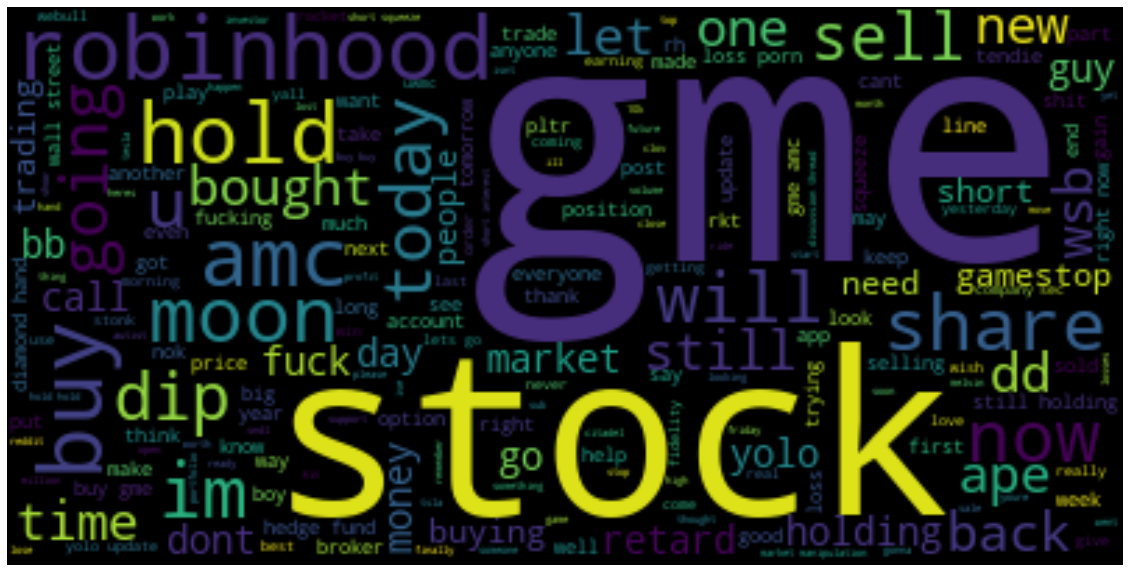

In [124]:
plt.figure(figsize=(20,20))
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

From this word cloud we can see which are the most frequently occurring words in all the posts.
In the word cloud, the words gme, stock, hold, today, sell, dip, amc appear frequently. this time the words can also be seen this time the topic is related to the stock and gamestop, and sell, hold these represent most people's views and opinions about this stock volatility. I think this word cloud may be very effective to see some elements of this event

In [127]:
def getPolScore(content_score):
    if content_score > 50:
      return 'positive'
    elif content_score==50:
      return 'neutral'
    elif content_score<50:
      return 'negative'
f_df['attitude_pol'] = f_df['score'].apply(getPolScore)
f_df.head(5)

,title,score,url,id,comms_num,word_count,timestamp,attitude_pol
0,its not about the money its about sendingmessage,55,https://v.redd.it/6j75regs72e61,l6ulcx,6,11,2021-01-28 21:37:41,positive
1,math professor scott steiner says the numbers ...,110,https://v.redd.it/ah50lyny62e61,l6uibd,23,12,2021-01-28 21:32:10,positive
3,new sec filing for gme can someone less retard...,29,https://sec.report/Document/0001193125-21-019848/,l6ugk6,74,13,2021-01-28 21:28:57,negative
4,not to distract from gme just thought our amc ...,71,https://i.redd.it/4h2sukb662e61.jpg,l6ufgy,156,15,2021-01-28 21:26:56,positive
6,short stock doesnt have an expiration date,317,https://www.reddit.com/r/wallstreetbets/commen...,l6uf6d,53,7,2021-01-28 21:26:27,positive


In [128]:
# Calculate the total number of titles with various attitudes.
pos_num=int(np.sum(f_df['attitude_pol']=='positive'))
neu_num=int(np.sum(f_df['attitude_pol']=='neutral'))
neg_num=int(np.sum(f_df['attitude_pol']=='negative'))

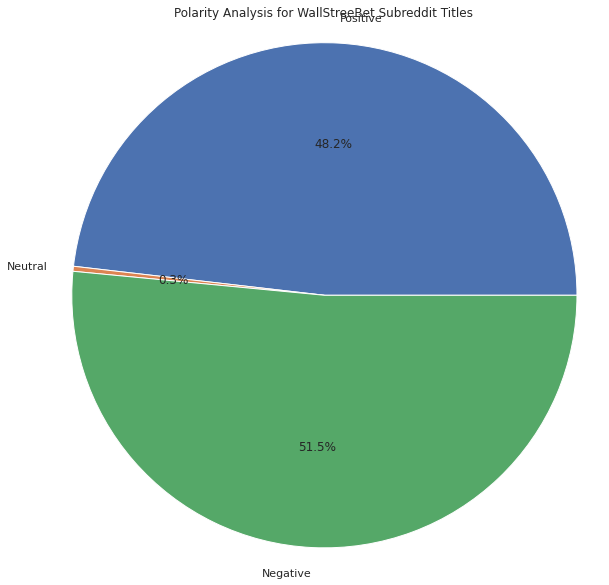

In [129]:
#Generate pie chart and print the results.
labels_num = ['Positive','Neutral','Negative']
sizes=[pos_num,neu_num,neg_num]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes,labels=labels_num, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Polarity Analysis for WallStreeBet Subreddit Titles')
plt.show()

In [130]:
print('Polarity Counts:')
print('Total Positive Title:', pos_num)
print('Total Neutral Title:', neu_num)
print('Total Negative Title:', neg_num)

Polarity Counts:
Total Positive Title: 20666
Total Neutral Title: 137
Total Negative Title: 22102


In general, the ratio of positive post and negative post is close to 50:50, which means that the matter has relatively different views for different people, and the emotional orientation is relatively evenly distributed. In addition there is a small part of the neutral emotion of the post, I think the neutral emotion is very special, and the score in the 50 emotion score can be negligible.